#  Scaling, Encoding, and Distances

Computers notice large magnitudes ﬁrst, not importance.Left unscaled, big numbers dominate distance and model behavior. It means that features with large scales can disproportionately influence the results of machine learning algorithms, leading to biased outcomes.

So, we need to make comparisons fair and not to remove meaning, but to give each feature an equal opportunity to contribute. That's where scaling and encoding come in.

### Why size can be misleading?

1. Different units confuse models: When features are measured in different units (e.g., height in centimeters and weight in kilograms), models may misinterpret their relative importance.

2. Scaling equalizes inﬂuence: Scaling ensures that all features contribute equally to the model's learning process, preventing any single feature from dominating due to its scale. So learning focuses on patterns, not magnitudes.

3. Fair comparison, better performance: Scaling allows models to make fair comparisons between features, leading to improved performance and more accurate predictions.

## Different Techmiques

1. Scaling: The process of transforming features to a common scale without distorting differences in the ranges of values.
   - Standardization (Z-score Normalization)
   - Min-Max Scaling (Rescaling to [0, 1])
   - Robust Scaling (Outlier Resistant Scaling)

2. Encoding: The process of converting categorical variables into a numerical format that can be used by machine learning algorithms.
   - One-Hot Encoding
   - Ordinal Encoding
   - Nominal vs Ordinal Variables

3. Distance Metrics: Methods to measure the distance or similarity between data points.
   - Euclidean Distance
   - Manhattan Distance

## Standardization (Z-score Scaling)

Standardization transforms data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian/Normal distribution. Mean of 0 means that the average value of the standardized data is 0, and a standard deviation of 1 means that the data points are spread out in such a way that approximately 68% of them fall within one standard deviation from the mean.

Formula: z=(x - μ) / σ

Where:
- z: Standardized value
- x: Original value
- μ: Mean of the original values
- σ: Standard deviation of the original values

Original Data:
    Income  Age
0   50000   25
1   60000   45
2   55000   35
3   80000   50
4  120000   23
The Z-Score Scaled Data:
    Income   Age
0   -0.80 -0.89
1   -0.45  0.79
2   -0.63 -0.05
3    0.24  1.21
4    1.64 -1.06


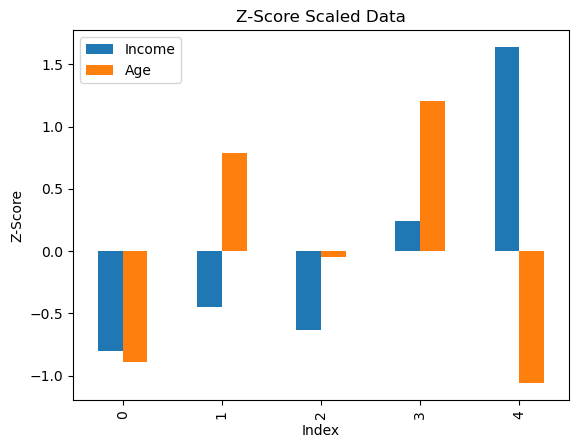

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Income': [50000, 60000, 55000, 80000, 120000],
    'Age': [25, 45, 35, 50, 23]
})      # Sample data with different scales

mean = df.mean()
std = df.std()

z_scaled_df = ((df - mean) / std).round(2)  # Z-Score Scaling
print("Original Data:\n", df)
print("The Z-Score Scaled Data:\n", z_scaled_df)

z_scaled_df.plot(kind='bar')
plt.title('Z-Score Scaled Data')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.show()      # Now the scales are comparable

## Min-Max Scaling (Rescaling to [0, 1])

Min-Max Scaling transforms features to a fixed range, usually [0, 1]. It is useful when the data does not follow a Gaussian distribution and when want to preserve the relationships between values. How to know if data is Gaussian or not? By using visualization techniques like histograms or Q-Q plots, or statistical tests like the Shapiro-Wilk test to assess the normality of the data. If the data has outliers, Min-Max Scaling can be sensitive to them, as they can significantly affect the minimum and maximum values used for scaling.

Formula: x' = (x - min) / (max - min)

Where:
- x': Scaled value
- x: Original value
- min: Minimum value in the original data
- max: Maximum value in the original data

Original Data:
    Income  Age
0   50000   25
1   60000   45
2   55000   35
3   80000   50
4  120000   23
The Min-Max Scaled Data:
    Income   Age
0    0.00  0.07
1    0.14  0.81
2    0.07  0.44
3    0.43  1.00
4    1.00  0.00


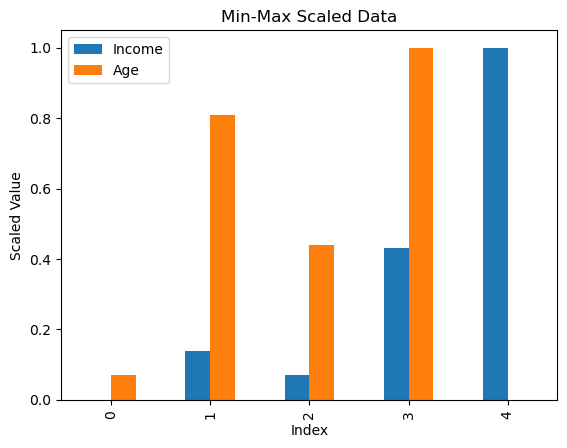

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Income': [50000, 60000, 55000, 80000, 120000],
    'Age': [25, 45, 35, 50, 23]
})      # Sample data with different scales

min_val = df.min()
max_val = df.max()
range_val = max_val - min_val

min_max_scaled_df = ((df - min_val) / range_val).round(2)  # Min-Max Scaling
print("Original Data:\n", df)
print("The Min-Max Scaled Data:\n", min_max_scaled_df)

min_max_scaled_df.plot(kind='bar')
plt.title('Min-Max Scaled Data')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.show()

## Robust Scaling (Outlier Resistant Scaling)

Robust Scaling uses statistics that are robust to outliers, such as the median and the interquartile range (IQR). It is useful when the data contains outliers that can skew the results of standardization or Min-Max Scaling. It separates the outliers from the main data distribution, allowing other values to be scaled for a more accurate representation of the central tendency and spread of the data. Thta does not mean outliers are removed, they are scaled differently to minimize their impact on the overall scaling process.

Formula: x' = (x - median) / IQR

Where:
- x': Scaled value
- x: Original value
- median: Median value in the original data
- IQR: Interquartile range (Q3 - Q1) in the original data

Original Data:
    Income  Age
0   50000   25
1   60000   45
2   55000   35
3   80000   50
4  120000   23
The Robust Scaled Data:
    Income   Age
0    -0.4 -0.50
1     0.0  0.50
2    -0.2  0.00
3     0.8  0.75
4     2.4 -0.60


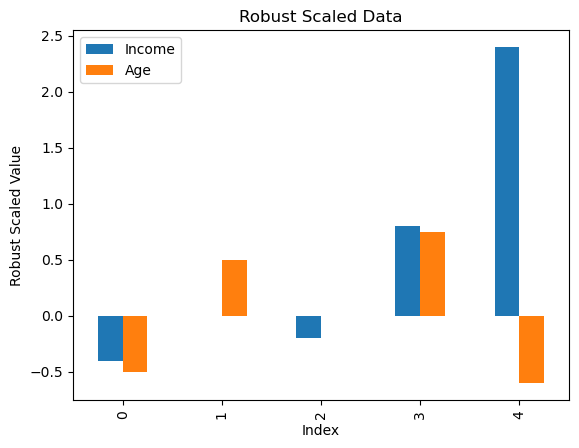

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Income': [50000, 60000, 55000, 80000, 120000],
    'Age': [25, 45, 35, 50, 23]
})   # Sample data with different scales

median_val = df.median()
iqr = df.quantile(0.75) - df.quantile(0.25)

robust_scaled_df = ((df - median_val) / iqr).round(2)  # Robust Scaling
print("Original Data:\n", df)
print("The Robust Scaled Data:\n", robust_scaled_df)

robust_scaled_df.plot(kind='bar')
plt.title('Robust Scaled Data')
plt.xlabel('Index')
plt.ylabel('Robust Scaled Value')
plt.show()

Comparison of Different Scaling Methods:
    Income  Age  Z-Score_Income  Z-Score_Age  Min-Max_Income  Min-Max_Age  \
0   50000   25           -0.80        -0.89            0.00         0.07   
1   60000   45           -0.45         0.79            0.14         0.81   
2   55000   35           -0.63        -0.05            0.07         0.44   
3   80000   50            0.24         1.21            0.43         1.00   
4  120000   23            1.64        -1.06            1.00         0.00   

   Robust_Income  Robust_Age  
0           -0.4       -0.50  
1            0.0        0.50  
2           -0.2        0.00  
3            0.8        0.75  
4            2.4       -0.60  


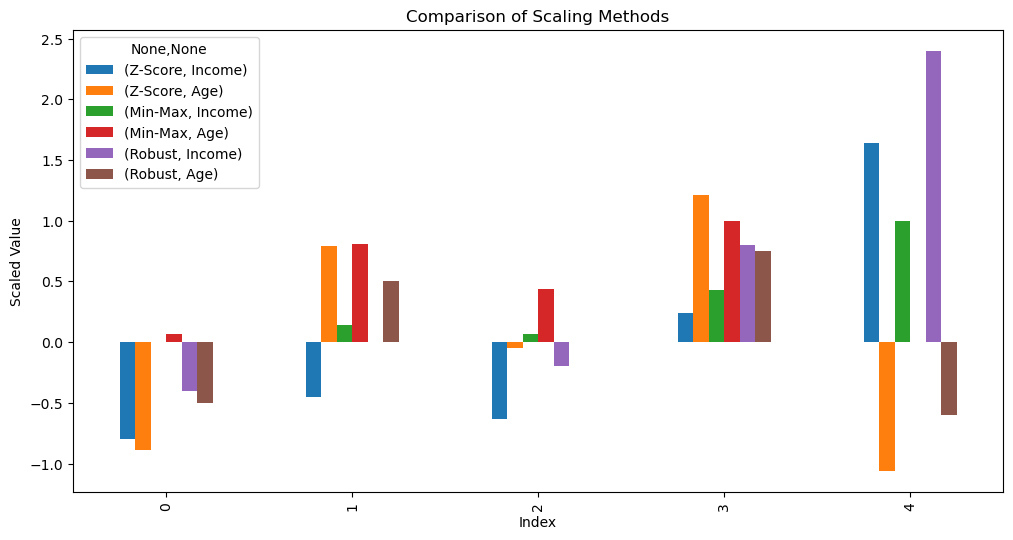

In [21]:
# Comparing Different Scaling Methods


print("Comparison of Different Scaling Methods:\n",pd.concat([df, z_scaled_df.add_prefix('Z-Score_'), min_max_scaled_df.add_prefix('Min-Max_'), robust_scaled_df.add_prefix('Robust_')], axis=1))

pd.concat([z_scaled_df, min_max_scaled_df, robust_scaled_df], axis=1, keys=['Z-Score', 'Min-Max', 'Robust']).plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Scaling Methods')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.show()  

### Comparing Different Scaling Methods & When to Use What

| Scaling Method      | When to Use                                      | Pros                                              | Cons                                               |
|---------------------|--------------------------------------------------|---------------------------------------------------|----------------------------------------------------|
| Standardization     | Data follows Gaussian distribution               | Centers data around 0, useful for algorithms assuming normality | Sensitive to outliers                              |
| Min-Max Scaling     | Data does not follow Gaussian distribution       | Preserves relationships between values, useful for algorithms requiring bounded input | Sensitive to outliers                              |
| Robust Scaling      | Data contains outliers                           | Resistant to outliers, focuses on central tendency | May not center data around 0, less intuitive interpretation |


### Nominal vs Ordinal Variables

- Nominal Variables: Categorical variables without an inherent order or ranking among the categories. Examples include colors (red, blue, green) or types of animals (dog, cat, bird).
- Ordinal Variables: Categorical variables with a clear order or ranking among the categories. Examples include education levels (high school, bachelor's, master's, doctorate) or customer satisfaction ratings (poor, fair, good, excellent).

As we see, nominal variables do not have a meaningful order, while ordinal variables have a defined order that indicates relative ranking or preference among the categories. To give numerical representation to these categorical variables, we use encoding techniques like One-Hot Encoding for nominal variables and Ordinal Encoding for ordinal variables.

### One-Hot Encoding

One-Hot Encoding converts categorical variables into a binary matrix representation. Each category is represented by a binary vector where only one element is "1" (indicating the presence of that category) and all other elements are "0". This method is suitable for nominal variables where there is no inherent order among the categories. Why 0 & 1? If we assign hiararchical numbers (like 1, 2, 3) to categories, it may imply an order that doesn't exist, leading to incorrect interpretations by machine learning algorithms. Instead, using 0s and 1s ensures that each category is treated equally without any implied ranking.

#### Procedure:
1. Identify the categorical variable to be encoded.
2. Create binary columns for each unique category in the variable.
3. Assign "1" to the column corresponding to the category present in each observation and "0" to all other columns.

But One-Hot Encoding can lead to high dimensionality, especially when dealing with categorical variables that have a large number of unique categories. This can increase the computational complexity and may lead to the "curse of dimensionality," where the model's performance degrades due to the sparsity of data in high-dimensional spaces.


### Ordinal Encoding

Ordinal Encoding assigns a unique integer to each category based on a defined order or ranking. This method is suitable for ordinal variables where the categories have a meaningful order. For example, in education levels, "high school" could be encoded as 1, "bachelor's" as 2, "master's" as 3, and "doctorate" as 4.

#### Procedure:
1. Identify the ordinal variable to be encoded.
2. Define the order of the categories.
3. Assign integers to each category based on the defined order.

In [30]:
import pandas as pd

df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['Small', 'Large', 'Medium', 'Medium', 'Large'],
    'Price': [10.99, 20.99, 15.99, 18.99, 22.99]
})

one_hot_encoded_df = pd.get_dummies(df['Color'], prefix='Color', dtype=int) # One-Hot Encoding for Nominal Variable. Now id 0 can be represented as [0,0,1]

oridinal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['Size_Encoded'] = df['Size'].map(oridinal_size_mapping).astype(int)      # Ordinal Encoding for Ordinal Variable

df_encoded = pd.concat([df, one_hot_encoded_df], axis=1)

print("Original Data:\n", df)
print("One-Hot Encoded Data:\n", df_encoded)

Original Data:
    Color    Size  Price  Size_Encoded
0    Red   Small  10.99             1
1   Blue   Large  20.99             3
2  Green  Medium  15.99             2
3   Blue  Medium  18.99             2
4    Red   Large  22.99             3
One-Hot Encoded Data:
    Color    Size  Price  Size_Encoded  Color_Blue  Color_Green  Color_Red
0    Red   Small  10.99             1           0            0          1
1   Blue   Large  20.99             3           1            0          0
2  Green  Medium  15.99             2           0            1          0
3   Blue  Medium  18.99             2           1            0          0
4    Red   Large  22.99             3           0            0          1


## Vector Concepts & Distance Metrics

- Dot product: It shows the similarity of directions between two vectors. A higher dot product indicates that the vectors are more similar in direction, while a lower dot product indicates they are less similar.
- Magnitude: It represents the length or size of a vector. It is calculated using the formula: ||A|| = √(a1² + a2² + ... + an²), where A is the vector and a1, a2, ..., an are its components.
- L2 Norm (**Euclidean Distance**): It measures the straight-line distance between two points in Euclidean space. It is calculated using the formula: d(A, B) = √((a1 - b1)² + (a2 - b2)² + ... + (an - bn)²) = sqrt(Σ(ai - bi)²), where A and B are the two points and a1, a2, ..., an and b1, b2, ..., bn are their respective components.
- L1 Norm (**Manhattan Distance**): It measures the distance between two points by summing the absolute differences of their corresponding components. It is calculated using the formula: d(A, B) = |a1 - b1| + |a2 - b2| + ... + |an - bn| = Σ|ai - bi|, where A and B are the two points and a1, a2, ..., an and b1, b2, ..., bn are their respective components.
- Unit Vector: A vector with a magnitude of 1. It is obtained by dividing each component of the vector by its magnitude. Unit vectors are often used to represent directions in space without regard to magnitude. 

In [1]:
import numpy as np

vector_a = np.array([3, 4, 7])
vector_b = np.array([1, 5, 2])

dot_product = np.dot(vector_a, vector_b)

# Manhattan (L1) and Euclidean (L2) Magnitudes: L1 is bigger than L2 because L1 sums absolute values while L2 takes the square root of summed squares.
magnitude_a_L2 = np.linalg.norm(vector_a)
magnitude_a_L1 = np.linalg.norm(vector_a, ord=1)

magnitude_b_L2 = np.linalg.norm(vector_b)
magnitude_b_L1 = np.linalg.norm(vector_b, ord=1)

L2_distance = np.linalg.norm(vector_a - vector_b)
L1_distance = np.linalg.norm(vector_a - vector_b, ord=1)

normalized_a = vector_a / magnitude_a_L2
normalized_b = vector_b / magnitude_b_L2

print("Vector A:", vector_a)
print("Vector B:", vector_b)
print("Dot Product of A and B:", dot_product)
print("L2 Magnitude of A:", magnitude_a_L2.round(2))
print("L1 Magnitude of A:", magnitude_a_L1)
print("L2 Magnitude of B:", magnitude_b_L2.round(2))
print("L1 Magnitude of B:", magnitude_b_L1)
print("L2 Distance between A and B:", L2_distance.round(2))
print("L1 Distance between A and B:", L1_distance)
print("Normalized Vector A:", normalized_a.round(2))
print("Normalized Vector B:", normalized_b.round(2))

Vector A: [3 4 7]
Vector B: [1 5 2]
Dot Product of A and B: 37
L2 Magnitude of A: 8.6
L1 Magnitude of A: 14.0
L2 Magnitude of B: 5.48
L1 Magnitude of B: 8.0
L2 Distance between A and B: 5.48
L1 Distance between A and B: 8.0
Normalized Vector A: [0.35 0.46 0.81]
Normalized Vector B: [0.18 0.91 0.37]


### In Summary

- Scaling -> Fairness
- Encoding -> Meaning
- Distances -> Similarity

### Data Transformation Pipeline
1. Raw Data Collection: Gather raw data from various sources.
2. Scaled & Encoded Data: Apply appropriate scaling and encoding techniques to prepare the data for analysis.
3. Vector Space: Represent the processed data as vectors in a multi-dimensional space for further analysis and modeling.
4. Distance-based Comparison: Use distance metrics to compare data points and identify patterns or relationships.